In [1]:
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import ablib
import matplotlib
from ablib.common.sensordatadb import SensorDataDb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 6)

ModuleNotFoundError: No module named 'ablib'

In [8]:
s = SensorDataDb()
s

In [14]:
out = s.get_todays_data('10-000801d2f1f3', db_ix=0)
out = s.get_todays_data('hydro', db_ix=0)
df = ablib.common.sensordatadb.json_to_np(out)

In [15]:
h = {'12:00 AM':0,  '01:00 AM':1, '02:00 AM':2, '03:00 AM':3, '04:00 AM':4, '05:00 AM':5, '06:00 AM':6, '07:00 AM':7, '08:00 AM':8, '09:00 AM':9, '10:00 AM':10 , '11:00 AM':11,
     '12:00 PM':12, '01:00 PM':13, '02:00 PM':14, '03:00 PM':15, '04:00 PM':16, '05:00 PM':17, '06:00 PM':18, '07:00 PM':19, '08:00 PM':20, '09:00 PM':21, '10:00 PM':22 , '11:00 PM':23,
         }

def hydro_interval_to_pd_datetime(s):
    date_period = re.compile('(\d+\:\d+\s\w+)\s')    
    out = date_period.findall(s)    
    out = out[0]    
    return float(h[out])

def hydro_time_to_pd_datetime(s):
    m = {'Jan':1, 'Feb':2, 'Mar':3, 'Dec':12};
    h = {'12:00 AM':0,  '01:00 AM':1, '02:00 AM':2, '03:00 AM':3, '04:00 AM':4, '05:00 AM':5, '06:00 AM':6, '07:00 AM':7, '08:00 AM':8, '09:00 AM':9, '10:00 AM':10 , '11:00 AM':11,
         '12:00 PM':12, '01:00 PM':13, '02:00 PM':14, '03:00 PM':15, '04:00 PM':16, '05:00 PM':17, '06:00 PM':18, '07:00 PM':19, '08:00 PM':20, '09:00 PM':21, '10:00 PM':22 , '11:00 PM':23,
         }
    date_period = re.compile('(\w{3})\s(\d+),\s(\d+)\s(\d+\:\d+\s\w+)\s')    
    out = date_period.findall(s)    
    out = out[0]
    newstr = "{0}-{1}-{2} {3}:00".format(out[2],m[out[0]],out[1],h[out[3]])        
    return pd.to_datetime(newstr)

rates = {'Off-Peak':0, 'On-Peak':2,'Mid-Peak':1}
rates_dollars = {'Off-Peak':0.101000, 'On-Peak':0.208000,'Mid-Peak':0.144000}
def foo(in_str):
    return float(in_str.replace('kWh',''))


def map_rates(x):
    return rates[x]

<IPython.core.display.Javascript object>


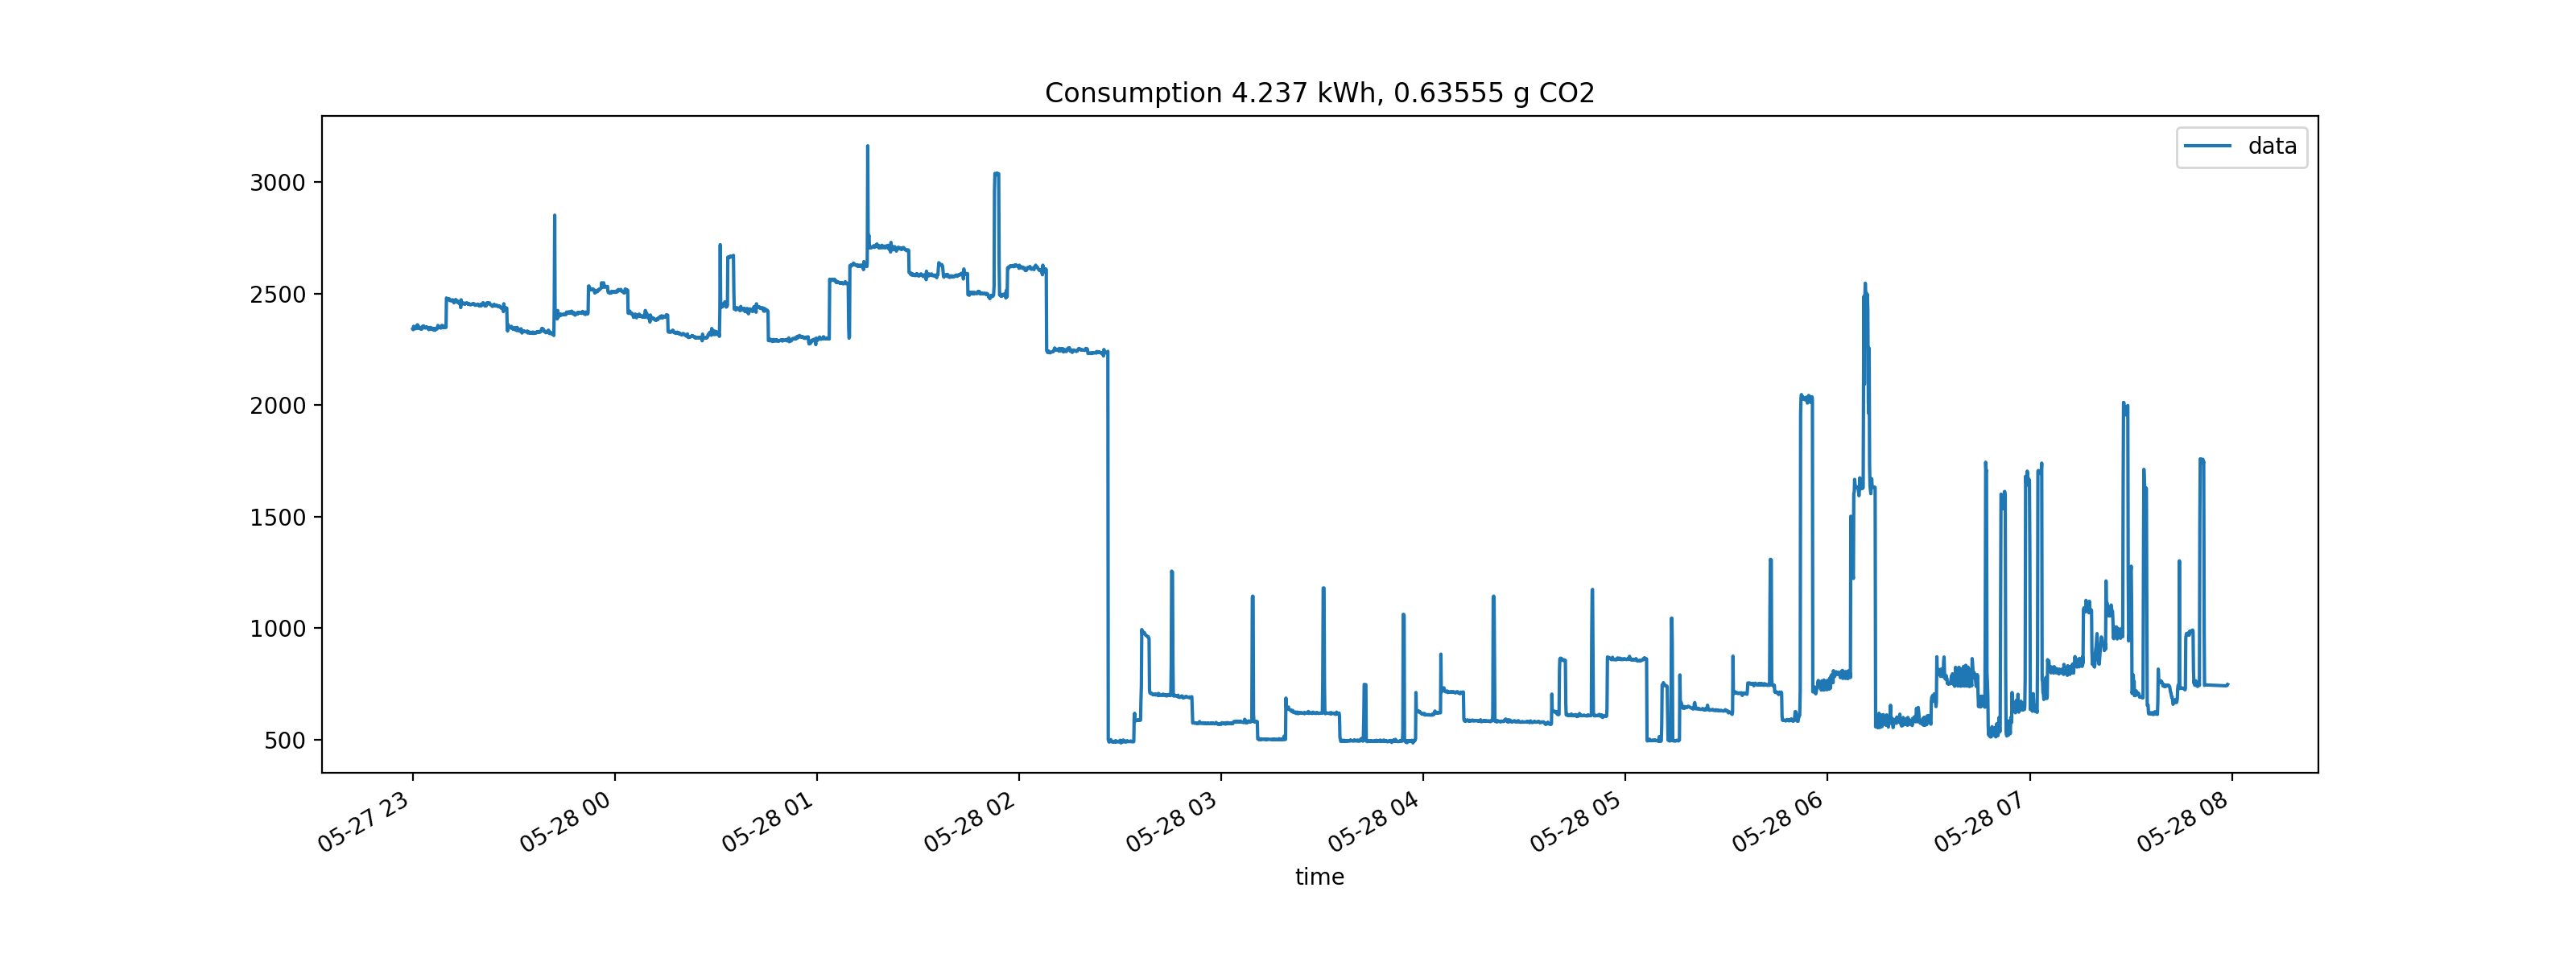

Text(0.5, 1.0, 'Consumption 4.237 kWh, 0.63555 g CO2')

In [16]:
out = s.get_todays_data('hydro', db_ix=0)
df = ablib.common.sensordatadb.json_to_np(out)
ax = df.plot(x='time', y='data')
kWh = df.data.size/1000
plt.title("Consumption {} kWh, {} g CO2".format(kWh, kWh * 0.15))

<IPython.core.display.Javascript object>


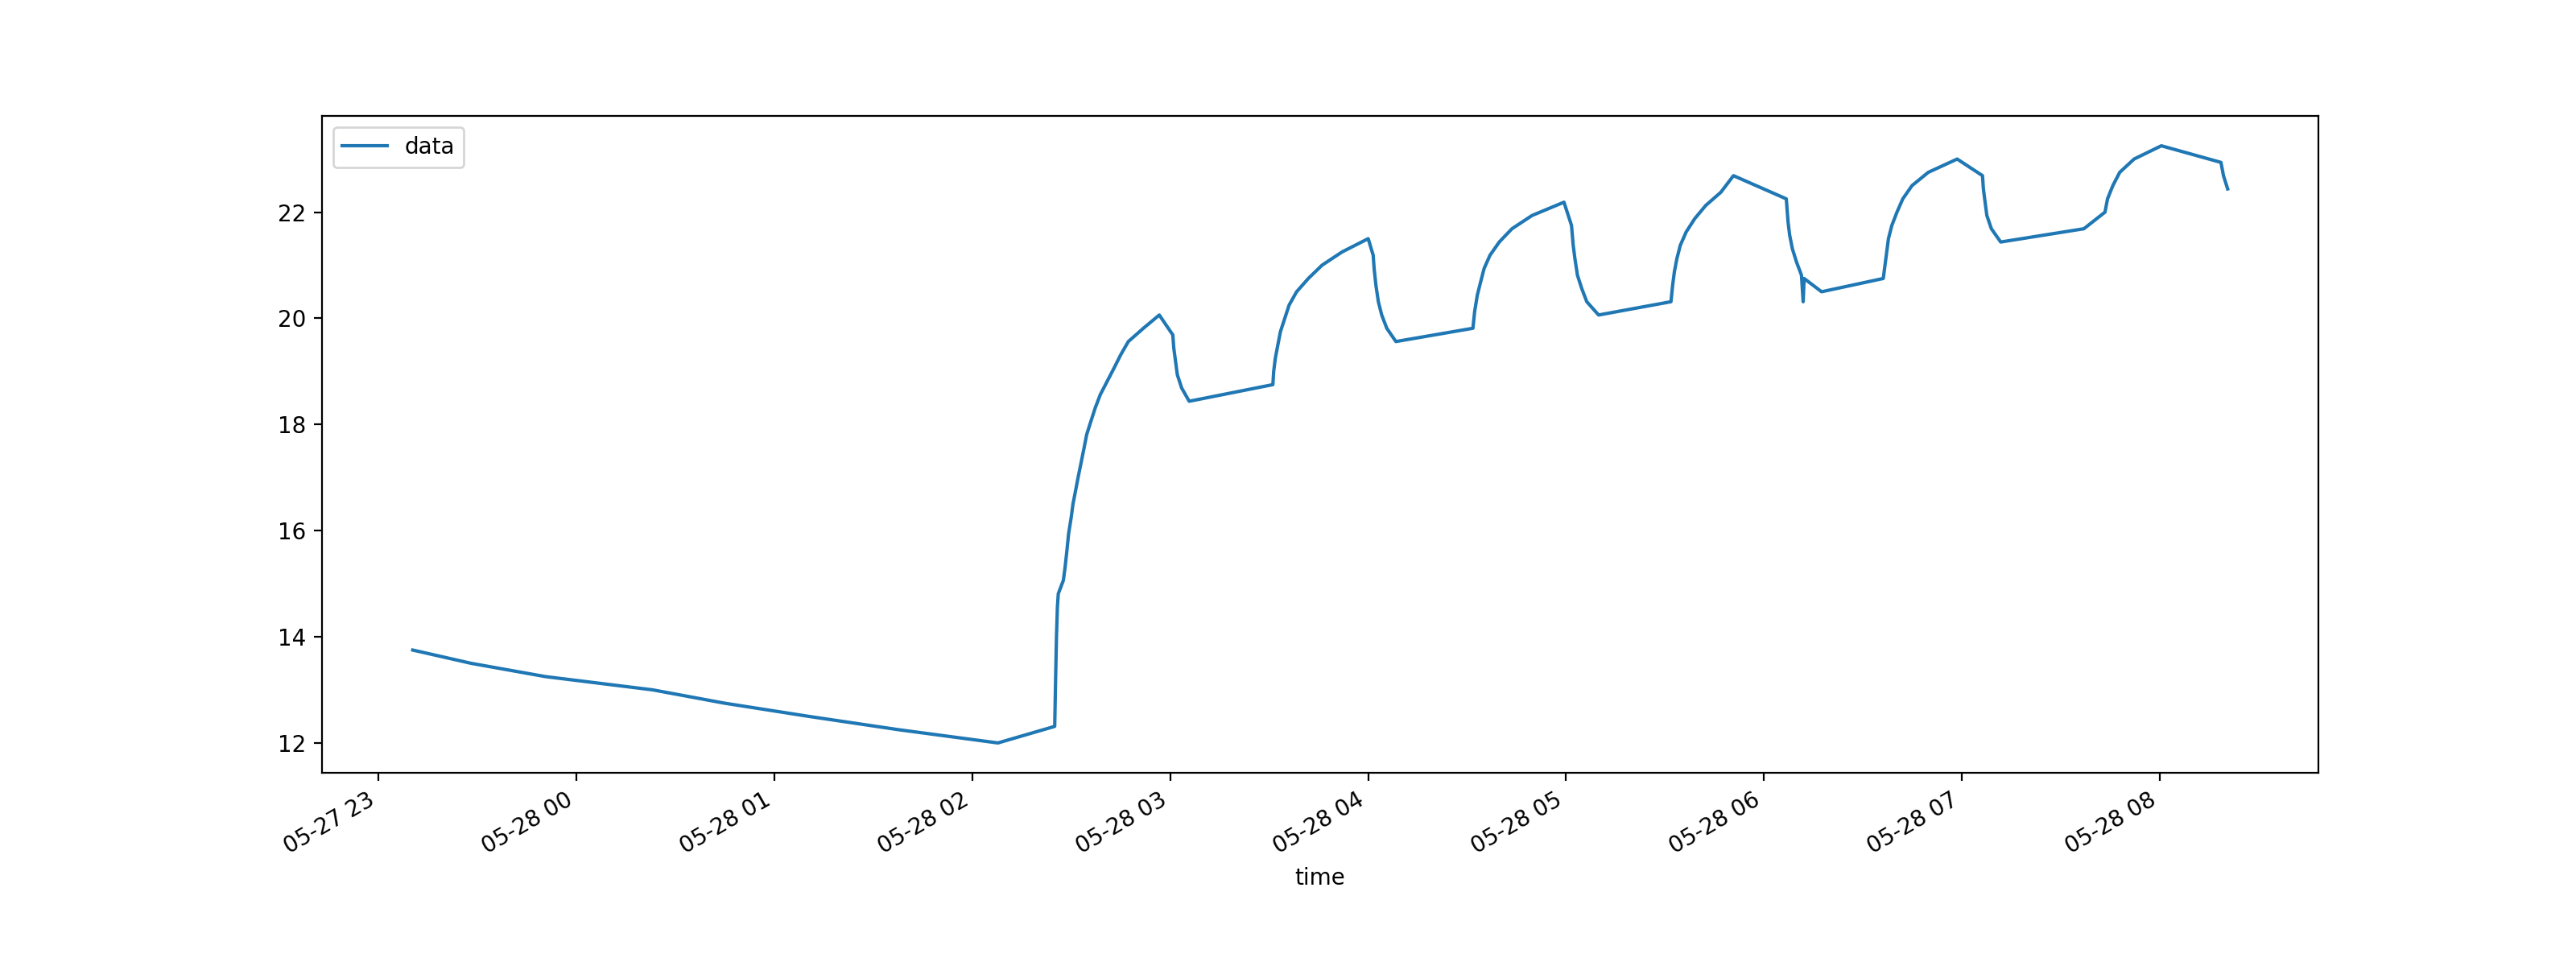

In [24]:
sn = '28-8000002700fc'
sn = '28-800000271d06'
sn = '10-000801d2f1f3'
sn = '10-000801c037f2'

# out = s.get_todays_data('10-000801d2f1f3', db_ix=0)
out = s.get_todays_data(sn, db_ix=0)

# out = s.get_todays_data('28-80000026a6d2', db_ix=1)
df = ablib.common.sensordatadb.json_to_np(out)
ax = df.plot(x='time', y='data')

<IPython.core.display.Javascript object>


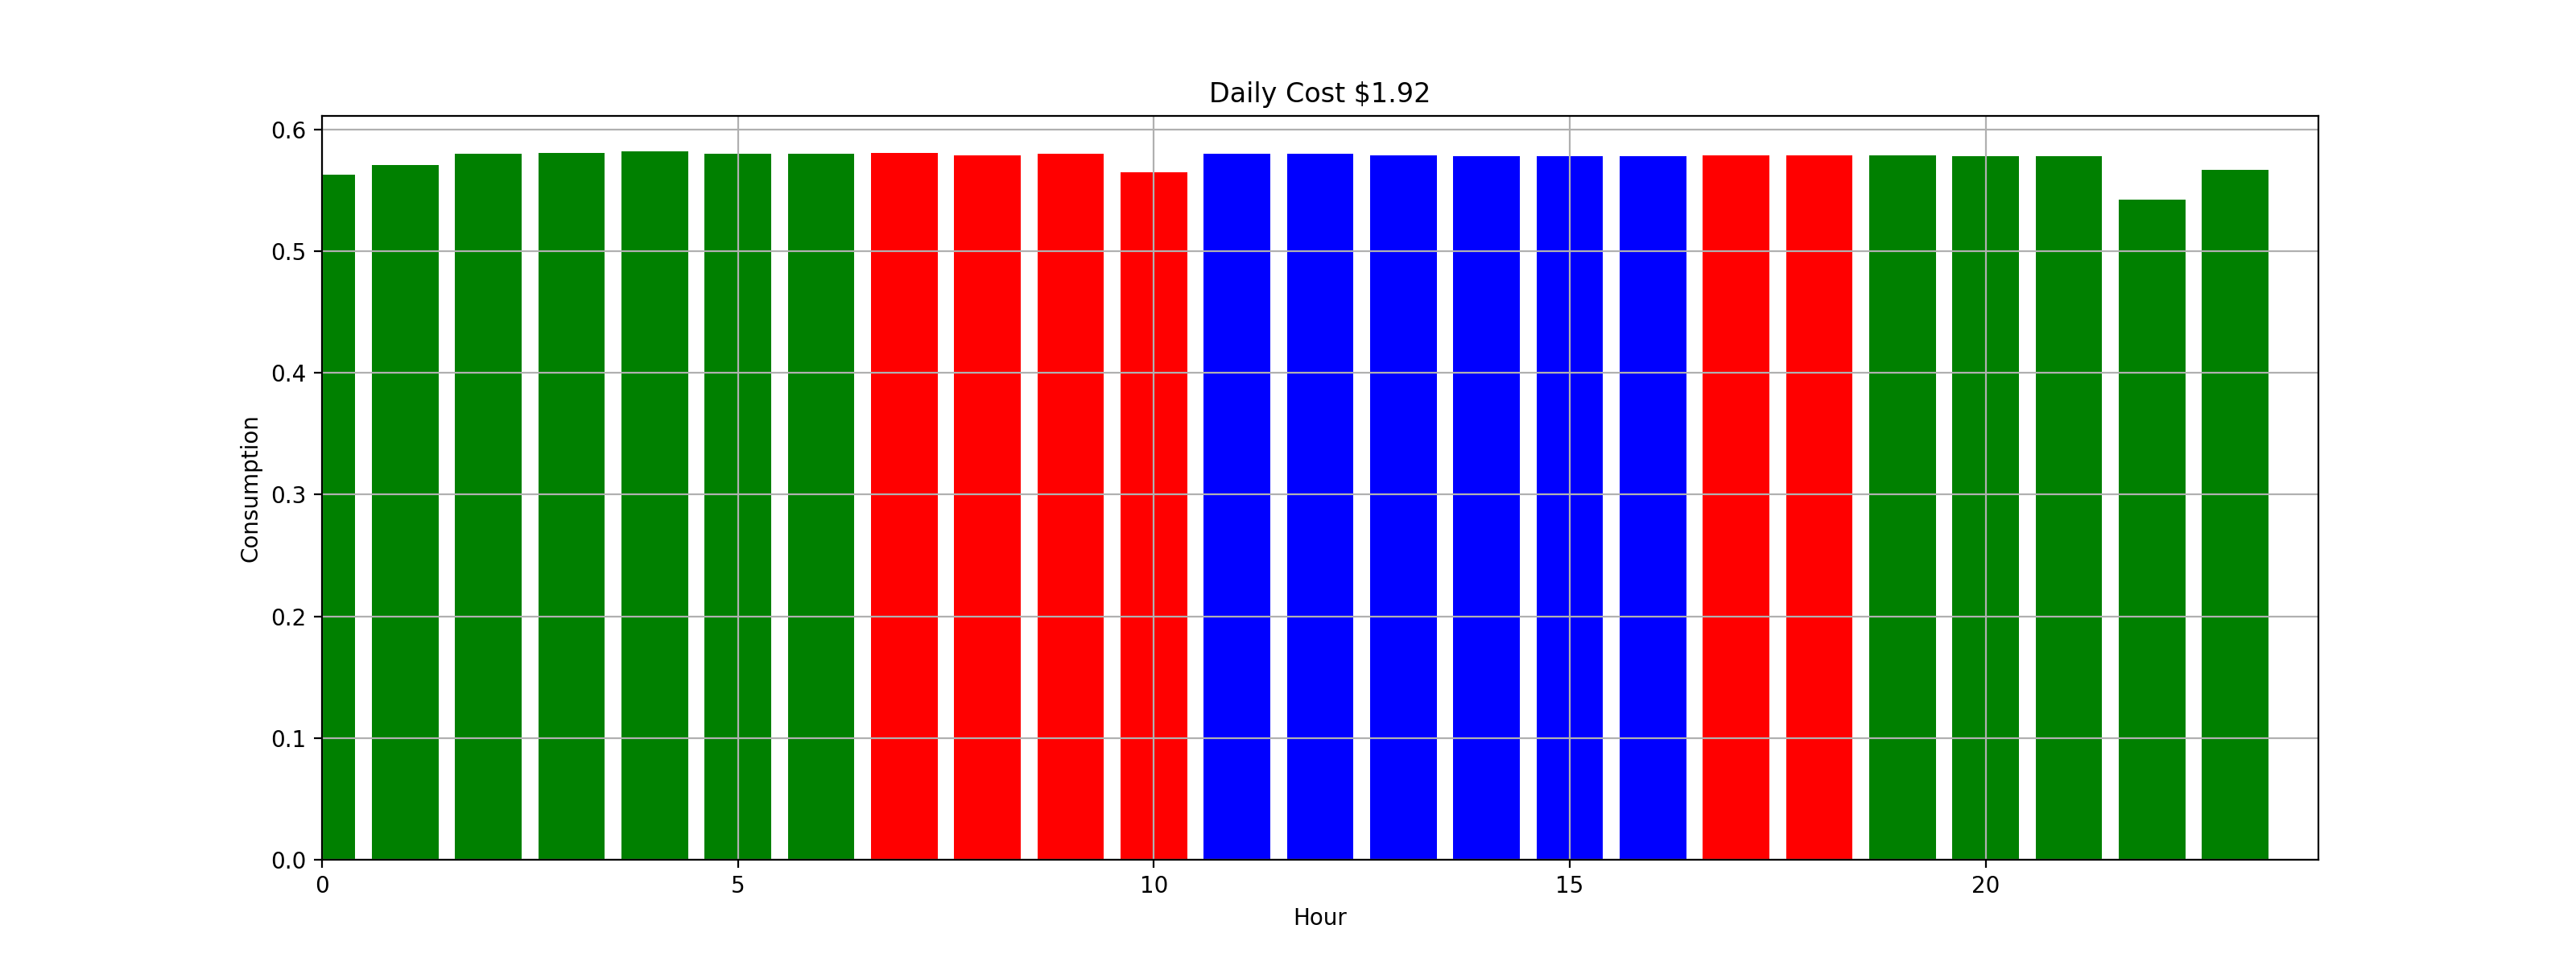

Text(0.5, 1.0, 'Daily Cost $1.92')

In [19]:

sn = "hydro"
out = s.get_days_data(sn, 2020, 5, 15, db_ix=0)
df =  ablib.common.sensordatadb.json_to_np(out)

fig, ax = plt.subplots(1, 1)
df['data'] = df['data'] - df['data'][0]
#df

#print(df.cwh[-1]/10.0)

#df_hr = df.resample('1H',fill_method='ffill').plot(ax=ax,color='r')
#df = df.resample('1H',fill_method='ffill')

low  = [0,1,2,3,4,5,6,19,20,21,22,23]
high = [7,8,9,10,17,18]
mid  = [11,12,13,14,15,16]

times          = pd.to_datetime(df.index)
df_hourly      = df.groupby([times.hour])
df_consumption = df_hourly['data'].count()/1000

time_period        = df_consumption.index
hourly_consumption = df_consumption.values

plt.bar(time_period[low],hourly_consumption[low],color='g')
plt.bar(time_period[mid],hourly_consumption[mid],color='b')
plt.bar(time_period[high],hourly_consumption[high],color='r')
plt.grid('on')
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.xlim([0,24])

total_pay = sum(hourly_consumption[low]) * rates_dollars['Off-Peak'] + sum(hourly_consumption[mid]) * rates_dollars['Mid-Peak'] + sum(hourly_consumption[high]) * rates_dollars['On-Peak']
plt.title(f"Daily Cost ${total_pay:.2f}")

In [83]:
deviceinstance = s.get_table('deviceinstance')
device = s.get_table('dev')

df = pd.DataFrame(deviceinstance[0])








AttributeError: module 'pandas' has no attribute 'describe'